# NHIRI Elias - TP 3 Machine Learning

In [4]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


Dans ce TP nous aborderons une partie du machine learning appellée sentimental analysis, on s'intéresse à des commentaires publiés dans des articles, ce sont nos features. À chacun est associé un label de type logistique 0 ou 1 qui représente si le commentaire donné est de manière respective négatif ou positif. L'objectif du sentimental analysis est de "détecter" le thème d'un corpus de phrases pour en dégager un sens mais aussi d'entrainer nos algorithmes pour faire de la prédiction sur un corpus de texte et en dégager de manière globale une idée de si on en parle positivement ou négativement.

### Import des données

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

On affiche les tailles des tableaux contenants les phrases

In [6]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [7]:
np.unique(y_train)

array([0, 1])

À chaque commentaire nous attribuons deux label possibles, nous sommes donc face à un problème de type logistique, affichons un Data Frame de nos phrases sous forme de chiffres.

In [8]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(y_train)
df = pd.concat([df1, df2],axis=1, join='inner')
df.columns=["sentence", "label"]
df

,sentence,label
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
5,"[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7...",0
6,"[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 532...",1
7,"[1, 4, 14906, 716, 4, 65, 7, 4, 689, 4367, 630...",0
8,"[1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664,...",1
9,"[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 16...",0


On remarque d'hors et déjà qu'à chaque mot des commentaires du corpus est associé un nombre, il nous sera important de savoir donc passer d'une expression à l'autre (chaîne de caractère - nombre entier) pour pouvoir entrainer nos algorithmes et créer des fonctions plus simplement.

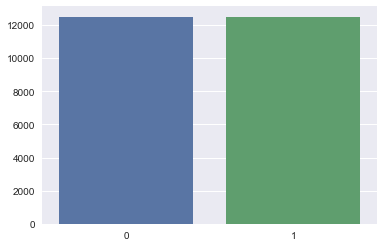

In [9]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

On a visulisé un équilibre dans notre jeu de donnée, dans la nature on a autant autant de labels positifs que negatifs, nous pouvons donc constituer un modèle sans avoir à réajuster les poids.

## Méthode Bag of words 

### Sur le jeu de données

Nous choisissons un jeu de données assez conséquent de 1000 phrases, inférieur au jeu de données complet de 25000 phrases car après plusieurs essais le kernel de la machine n'a pas supporté la complexité des calculs sur le TF_IDF ainsi que l'apprentissage supervisé.

In [10]:
limit = 1000
X= df['sentence']
X_sub= df['sentence'][0:limit]
X_sub

0      [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1      [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2      [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3      [1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...
4      [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
5      [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7...
6      [1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 532...
7      [1, 4, 14906, 716, 4, 65, 7, 4, 689, 4367, 630...
8      [1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664,...
9      [1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 16...
10     [1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 1...
11     [1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 139...
12     [1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, ...
13     [1, 259, 37, 100, 169, 1653, 1107, 11, 14, 418...
14     [1, 503, 20, 33, 118, 481, 302, 26, 184, 52, 8...
15     [1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, ...
16     [1, 7092, 1662, 11, 4, 1749, 9, 4, 2165, 4, 74...
17     [1, 33, 4, 5673, 7, 4, 6

On crée un dictionnaire affichant pour chaque mot du corpus son nombre associé, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique).

In [11]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Les textes ont été hashés

Nous proposons une fonction qui permet d'afficher le mot correspondant à chaque nombre dans une phrase du corpus.

In [12]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

In [13]:
for word_num in X_train[5]:
    getKeysByValue(imdb.get_word_index(),word_num)

['the']
['effort']
['still']
['been']
['that']
['usually']
['makes']
['for']
['of']
['finished']
['sucking']
['ended']
["cbc's"]
['an']
['because']
['before']
['if']
['just']
['though']
['something']
['know']
['novel']
['female']
['i']
['i']
['slowly']
['lot']
['of']
['above']
['freshened']
['with']
['connect']
['in']
['of']
['script']
['their']
['that']
['out']
['end']
['his']
['deceptively']
['i']
['i']


Nous choisissons de coder une fonction qui va faire le travail de modification de l'état nombre à l'état chaîne de caractère pour chaque phrase du corpus.

In [14]:
def function(dictOfElements, X):
    for i in range(X.shape[0]):
        listOfItems = dictOfElements.items()
        listOfKeys = list()
        for valueToFind in X[i]:
            for item  in listOfItems:
                if item[1] == valueToFind:
                    listOfKeys.append(item[0])
            X[i] = listOfKeys

Puis nous affichons les tableaux des nombres convertis en chaînes de caractère, correspondants à chaque commentaire.

In [15]:
dictOfElements = imdb.get_word_index()
function(dictOfElements, X_sub)
X_sub

0      [the, as, you, with, out, themselves, powerful...
1      [the, thought, solid, thought, senator, do, ma...
2      [the, as, there, in, at, by, br, of, sure, man...
3      [the, of, bernadette, mon, they, halfway, of, ...
4      [the, sure, themes, br, only, acting, i, i, wa...
5      [the, effort, still, been, that, usually, make...
6      [the, boiled, full, involving, to, impressive,...
7      [the, of, installed, local, of, their, br, of,...
8      [the, out, can't, some, to, hit, looking, when...
9      [the, as, on, there, plot, she's, iii, film, t...
10     [the, clear, fact, entertaining, there, life, ...
11     [the, no, was, personality, as, on, was, me, t...
12     [the, was, did, hands, fact, absolute, was, th...
13     [the, especially, like, after, same, scientist...
14     [the, child, on, they, where, totally, instead...
15     [the, is, rate, hope, br, my, out, double, thi...
16     [the, auto, cross, this, of, mental, it, of, d...
17     [the, they, of, rukh, br

In [16]:
for i in range(limit):
    X_sub[i] = ' '.join(X_sub[i])
X_sub

0      the as you with out themselves powerful lets l...
1      the thought solid thought senator do making to...
2      the as there in at by br of sure many br of pr...
3      the of bernadette mon they halfway of identity...
4      the sure themes br only acting i i was favouri...
5      the effort still been that usually makes for o...
6      the boiled full involving to impressive boring...
7      the of installed local of their br of attentio...
8      the out can't some to hit looking when is them...
9      the as on there plot she's iii film that for f...
10     the clear fact entertaining there life back br...
11     the no was personality as on was me time along...
12     the was did hands fact absolute was then laugh...
13     the especially like after same scientist state...
14     the child on they where totally instead he aro...
15     the is rate hope br my out double this is agai...
16     the auto cross this of mental it of driven of ...
17     the they of rukh br of a

Enfin, nous avons convertit les tableaux en chaînes de caractère. Affichons le dictionnaire de ce corpus de 1000 commentaires. 

In [17]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['000', '0080', '0083', '00s', '01', '04', '06', '08', '087', '10', '100', '1000', '1000s', '100s', '101', '102', '103', '106', '109', '10x', '11', '112', '1138', '12', '120', '12a', '12th', '13', '13th', '14', '142', '149', '14a', '14th', '15', '150', '16', '17', '175', '1798', '17th', '18', '180', '1837', '1871', '1888', '1897', '18th', '19', '1900', '1901', '1915', '1920', '1920s', '1929', '1930', '1930s', '1931', '1932', '1933', '1935', '1936', '1938', '193o', '1940', '1940s', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1950s', '1952', '1953', '1955', '1956', '1957', '1959', '1960', '1960s', '1961', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1am', '1st', '20', '200', '2000', '2001', '2

In [18]:
print(count_vect.vocabulary_.get(u'remembered'))

13507


Nous codons une fonction de comptage d'apparation de chaque mot dans base de donnée "commentaires" en paramètre et de tracer son histogramme en affichant le nombre de mots considérés.

In [19]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [20]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  18478


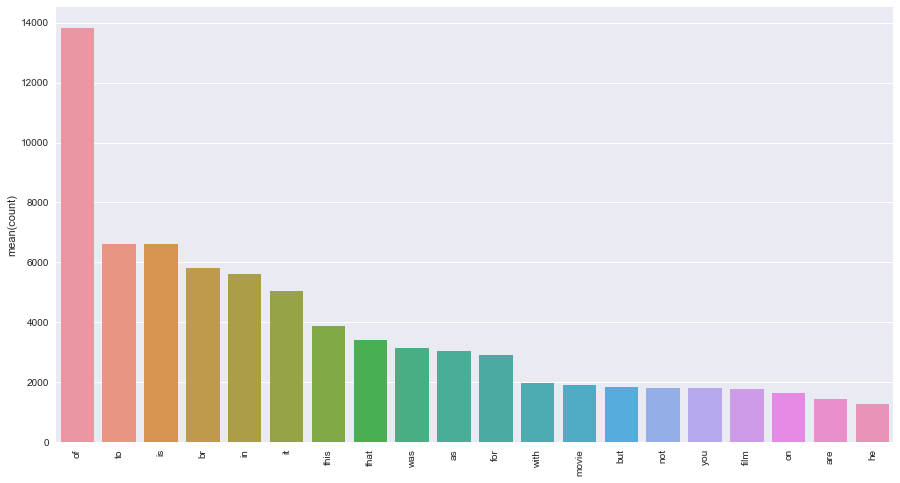

In [21]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

Nous avons donc un corpus de 1000 phrases, un ensemble de 18 478 mots, nous observons que les mots dont l'occurence est la plus forte sont des mots très communs, très redondants dans la langue anglaise ce qui n'est pas surprenant. Nous choisissons donc de retirer ces mots appartenant à une liste "stop words", car ils faussent nos résultats. Nous rappelons que l'on desir dégager du corpus une certaine humeur générale des commentaires de type soit positive soit négative.

### Préparation des données

In [22]:
stop = set(stopwords.words('english')) 
print(stop)

{'am', "didn't", 'when', 'any', 'wouldn', 'about', "you're", "wouldn't", 'do', 'can', 'at', "you'll", "don't", "isn't", 'should', "shouldn't", 'd', "hasn't", 'y', 'on', 'll', 'ours', 'own', 'won', 'couldn', 'not', 'themselves', 'does', 'been', 'we', 'which', 'under', 't', 'mustn', 'him', 'yourselves', 'in', 'yours', 'now', "weren't", 'by', 'himself', 'some', 'each', 'be', 'all', "should've", 'with', "doesn't", 'because', 'no', 'other', 're', 'just', 'very', 'haven', 'a', "mightn't", 'once', 'me', 'my', 'before', 'than', 'theirs', "mustn't", 'he', 'until', 'has', 'nor', 'ma', 'her', "couldn't", 'i', 'an', 'who', 'then', 'yourself', 'over', 'having', 'm', 'doesn', 'o', 'most', 'up', 'needn', 'your', 'they', 'is', 'itself', 'don', 'whom', 'into', 'what', 'did', 'there', 'again', 'but', 'isn', 'ain', 'myself', 'few', "needn't", 've', "hadn't", 'same', 'only', 'why', 'shouldn', 'more', "wasn't", 'wasn', 'shan', 'where', 'our', 'she', 'that', 'you', 'those', 'above', 'it', 'so', 'are', 'didn

Taille du dictionnaire :  18337


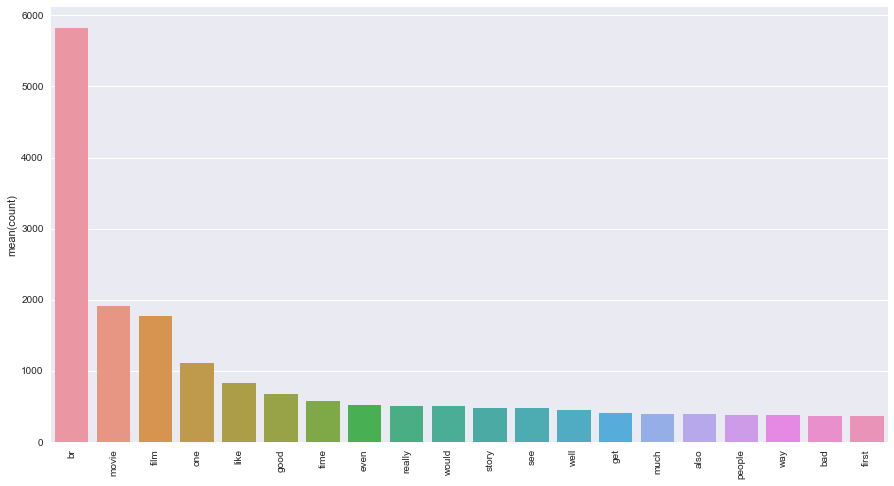

In [23]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X_sub)

Sans surprise la taille du dictionnaire associé diminue de 141 mots car nous avons retirés les mots considérés comme inutiles, néanmoins plusieurs mots subsistent et ne contribuent pas forcement à la réponse recherhchée nous allons donc de nouveau "nettoyer" nos données en retirant quelques mots.

In [24]:
stop.update({'br','film','one','movie','get','time','films','movies','see','story','way','would'})

Taille du dictionnaire :  18325


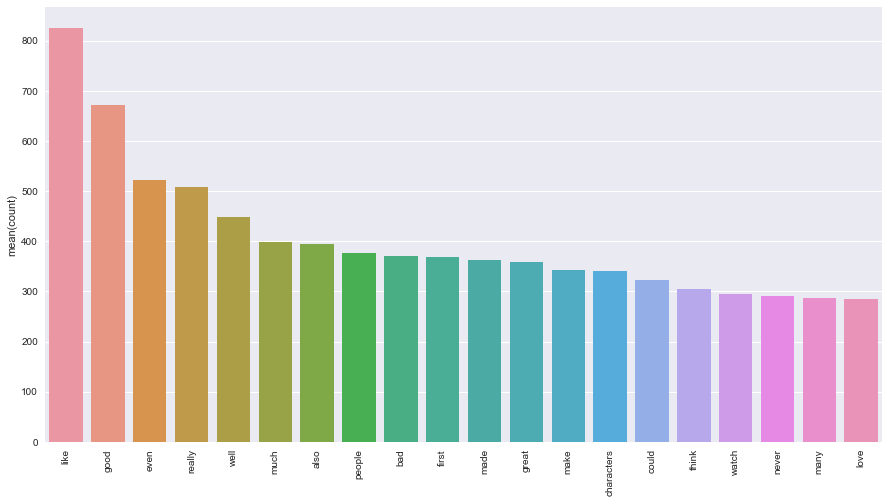

In [25]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X_sub)

On remarque très clairement que le mot à connotation positive ou négative étant le plus redondant est le mot "like" suivit par "good" ont peut proposer le fait que le corpus soit plutot constitué d'avis positifs.

### Visualisation du corpus

In [31]:
Y_sub = df['label'][0:limit]
Y_sub['labels'] = np.array([i for i in Y_sub[0:limit]])
Y_sub[limit]
#limit = X_sub.shape[0]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1,

## Méthode de comptage

Nous allons tenter de visulaiser ce qu'on appelle les poids dans la méthode de comptage, correspondant au coefficient ou plutot l'importance d'un mot à dégager une humeure plutot positive ou négative. Nous verrons l'apparition de points plus ou moins foncés selon leur poids.

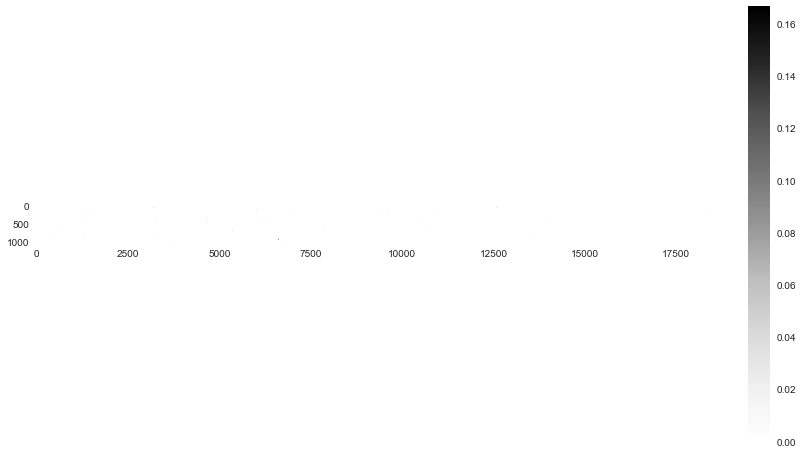

In [32]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(Y_sub['labels']),:],)
plt.colorbar()

In [33]:
#hist[np.argsort(df['label']),:]
print(hist.shape)

(1000, 18325)


### Avec TF_IDF

Avec la méthode TF_IDF nous normalisons les poids afin d'obtenir des résultats plus représentatifs, plus équlibrés et donc plus parlant en terme de comparaison.

In [34]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [35]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])

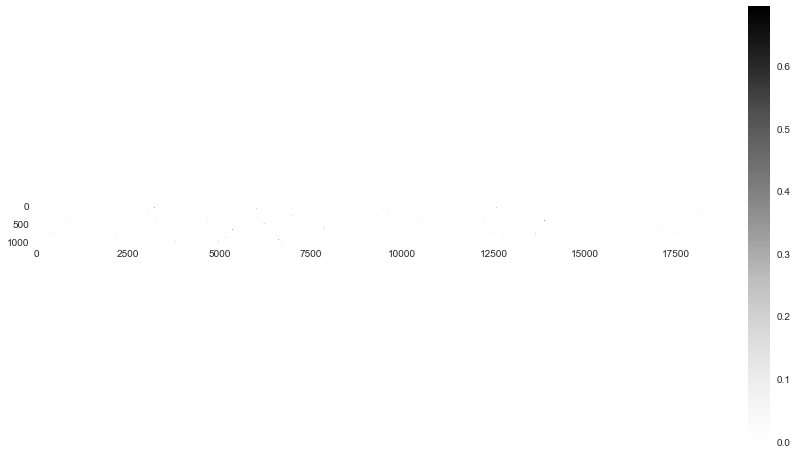

In [36]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(Y_sub['labels']),:])
plt.colorbar()

Nous observons une apparition plus importante de points foncés donc représentatifs de nos résultats.

## Apprentissage supervisé

### Sur les counts

In [37]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=Y_sub['labels'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),Y_sub['labels'])

0.98399999999999999

Suite à l'application de la méthode de classification Naïve Bayes, nous avons un résultat de précision d'environ 98%. Ce score est très bon mais malheuresement pas très représentatif vu que l'on travail sur uniquement 4% de l'ensemble de nos données.

### Sur le TF-IDF

In [38]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=Y_sub['labels'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),Y_sub['labels'])

0.996

Avec cette méthode de classification TF-IDF on obtient un meilleur score, cette méthode est celle que l'on retiendra quant à la prédiction de nos labels, malgré le jeu de donné non représentatif sur lequel nous entraînons l'algorithme. Essayons de visualiser le nombre d'erreurs comises pas nos deux algorithmes.

In [39]:
Y_sub['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])
Y_sub['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())
Y_sub[Y_sub['prediction_tfidf'] != Y_sub['labels']]

97     1
653    1
732    1
768    1
Name: label, dtype: object

In [40]:
Y_sub[Y_sub['prediction_counts'] != Y_sub['labels']]

97     1
163    1
221    1
256    1
307    1
339    1
421    1
461    1
463    1
469    1
491    1
537    1
589    1
626    1
810    0
953    1
Name: label, dtype: object

On remarque que la prédiction suite à la méthode TF_IDF est bien meilleure avec moins d'erreurs comises, nous retiendrons la méthode IF_IDF pour ce jeu de données.

### Sur le SGDClassifier

In [41]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42)   # arg optionnel : ",\max_iter=5, tol=None"
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=Y_sub['labels'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),Y_sub['labels'])

0.997

On remarque que la méthode SGD nous renvoie une précision de 97% elle est donc meilleure que le TF-IDF.

## Réponse des mots les plus significatifs

In [42]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  sure
Mots avec le coeff le plus positif :  played


On récupère les mots des plus importants poids connotants la positivité et la négativité des avis comme étants respctivement  "played" et "sure". Ceci ne nous parle pas vraiment, sans doute car nous avons traité un nombre trop faible de données pour avoir une réponse ayant du sens, où plutot un lien avec un mot positif ou négatif de la langue. Peut être qu'en menant une étude uniquement sur la liste des stop words nous aurions eut des résultats plus parlant, néanmoins ce serait beacoup trop exaustif de retirer chaque mots à la main un à un.

### Avec une pipeline

In [43]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42)),])

In [44]:
text_clf.fit(X_sub, Y_sub['labels'])
accuracy_score(text_clf.predict(X_sub),Y_sub['labels'])

0.99399999999999999

Avec une pipeline nous obtenons 99%, le meilleur résultat de précision en comparaison avec les méthodes précédentes sur le sous jeu de données de 1000 commentaires. Il serait malheuresement trop atif de vouloir établir une conclusion car nous avons traîté uniquement 4% de l'entierté du jeu de données.

## Recherches..

In [227]:
def count_sentence(X,i):
    m_occur = np.array([  np.arange(1,np.max(X[i])+1)  ,  np.zeros(np.max(X[i]))  ])
    for word in X[i]:
        m_occur[1][word-1] += 1
    return(m_occur)

In [228]:
def count(X):
    max = 1
    for i in range(X.shape[0]):
        if max < np.max(X[i]): 
            max = np.max(X[i])
    occur_tot  = np.array([  np.arange(1,max + 1)  ,  np.zeros(max)  ])
    for i in range(X.shape[0]):
        occur_temp = count_sentence(X,i)
        for j in range(occur_temp.shape[1]):
            occur_tot[1][j-1] += occur_temp[1][j-1]
    return(occur_tot)    